Nimrod Abraham Saigg

Luis Eduardo Catán

Carlos García

In [1]:
!pip install plotly



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [11]:
!pip install nbformat==4.2.0


  Obtaining dependency information for nbformat==4.2.0 from https://files.pythonhosted.org/packages/f2/fd/f3d5316d3d3c295993cf7d08d0105f2454acef9db363b33b72e3aed0808e/nbformat-4.2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for ipython-genutils from https://files.pythonhosted.org/packages/fa/bc/9bd3b5c2b4774d5f33b2d544f1460be9df7df2fe42f352135381c347c69a/ipython_genutils-0.2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema!=2.5.0,>=2.4 from https://files.pythonhosted.org/packages/39/9d/b035d024c62c85f2e2d4806a59ca7b8520307f34e0932fbc8cc75fe7b2d9/jsonschema-4.21.1-py3-none-any.whl.metadata
  Obtaining dependency information for attrs>=22.2.0 from https://files.pythonhosted.org/packages/e0/44/827b2a91a5816512fcaf3cc4ebc465ccd5d598c45cefa6703fcf4a79018f/attrs-23.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema-specifications>=2023.03.6 from https://files.pythonhosted.org/packages/ee/07/44bd408781594c4d0

In [13]:
import pandas as pd
import plotly.express as px

In [14]:
df = pd.read_csv('/Users/nimi/Github Repository/primero/data/finance_info.csv')

In [15]:
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


Histograma de la variable age

In [16]:

fig = px.histogram(df, x='age', title='Histograma de Edad', nbins=20, barnorm='percent',
                   barmode='overlay', opacity=0.5)
fig.update_layout(bargap=0.1)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Relación entre las variables 'Age' y 'Do You invest in Stock Market?':



In [ ]:
investors_by_age = df[df['Stock_Marktet'] == 'Yes'].groupby('age').size().reset_index(name='Investors')
non_investors_by_age = df[df['Stock_Marktet'] == 'No'].groupby('age').size().reset_index(name='Non-Investors')

# Fusionamos los datos
merged_df = investors_by_age.merge(non_investors_by_age, on='age', how='outer').fillna(0)

# Barras apiladas
fig = px.bar(merged_df, x='age', y=['Investors', 'Non-Investors'],
             title='Cantidad de Personas que Invierten y no Invierten en el Mercado de Valores por Edad',
             labels={'age': 'Edad', 'value': 'Número de Personas', 'variable': 'Tipo de Inversor'},
             color_discrete_map={'Investors': 'blue', 'Non-Investors': 'red'},
             barmode='stack')

fig.show()


Muestra la relación entre 'How long do you prefer to keep your money in any investment instrument?' y 'How do you monitor your investment?'


In [ ]:
category_order = ['Less than 1 year', '1-3 years', '3-5 years', 'More than 5 years']

# Ordenar el DataFrame según el orden definido
df['Duration'] = pd.Categorical(df['Duration'], categories=category_order, ordered=True)
df = df.sort_values('Duration')

# Crear el gráfico de barras agrupadas
fig = px.bar(df, x='Duration', color='Invest_Monitor', title='Duración de la Inversión vs Monitoreo de la Inversión',
             labels={'Duration': 'Duración de la Inversión', 'Invest_Monitor': 'Método de Monitoreo', 'count': 'Cantidad'},
             barmode='group')

fig.show()


Gráfico 1

In [ ]:
# Limpiar los valores de la columna 'Expect'
df['Expect'] = df['Expect'].str.replace('%', '').str.split('-').apply(lambda x: (float(x[0]) + float(x[1])) / 2 if len(x) > 1 else float(x[0]))

# Calcular el promedio de expect para cada grupo de género y edad
avg_expect_by_gender_age = df.groupby(['gender', 'age'])['Expect'].mean().reset_index()

# Crear el gráfico de dispersión
fig = px.scatter(avg_expect_by_gender_age, x='age', y='Expect', color='gender',
                 title='Expectativas de Rendimiento Promedio por Género y Edad',
                 labels={'age': 'Edad', 'Expect': 'Expectativas de Rendimiento', 'gender': 'Género'},
                 trendline='ols')  # Agregar una línea de tendencia de regresión lineal

fig.show()



El gráfico de dispersión que hemos creado muestra la relación entre la edad y las expectativas de rendimiento promedio para diferentes grupos de género. Aquí hay algunas interpretaciones posibles del gráfico:



Gráfico 2

In [ ]:
import seaborn as sns

In [ ]:
df_g = df.groupby("Objective").median().reset_index().copy()


<ipython-input-9-8280f4933b34>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
df_g.head()

,Objective,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,Expect
0,Capital Appreciation,27.0,2.0,3.0,6.0,5.0,4.0,1.0,6.0,25.0
1,Growth,30.0,2.0,4.0,7.0,5.0,3.0,1.0,6.0,25.0
2,Income,24.0,2.0,1.0,3.0,6.0,6.0,4.0,6.0,15.0


In [ ]:
df_g.drop(columns=["age","Expect"], inplace=True)

In [ ]:
df_g["Objective"] = df_g["Objective"].astype("category")

In [ ]:
df_g


,Objective,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
0,Capital Appreciation,2.0,3.0,6.0,5.0,4.0,1.0,6.0
1,Growth,2.0,4.0,7.0,5.0,3.0,1.0,6.0
2,Income,2.0,1.0,3.0,6.0,6.0,4.0,6.0


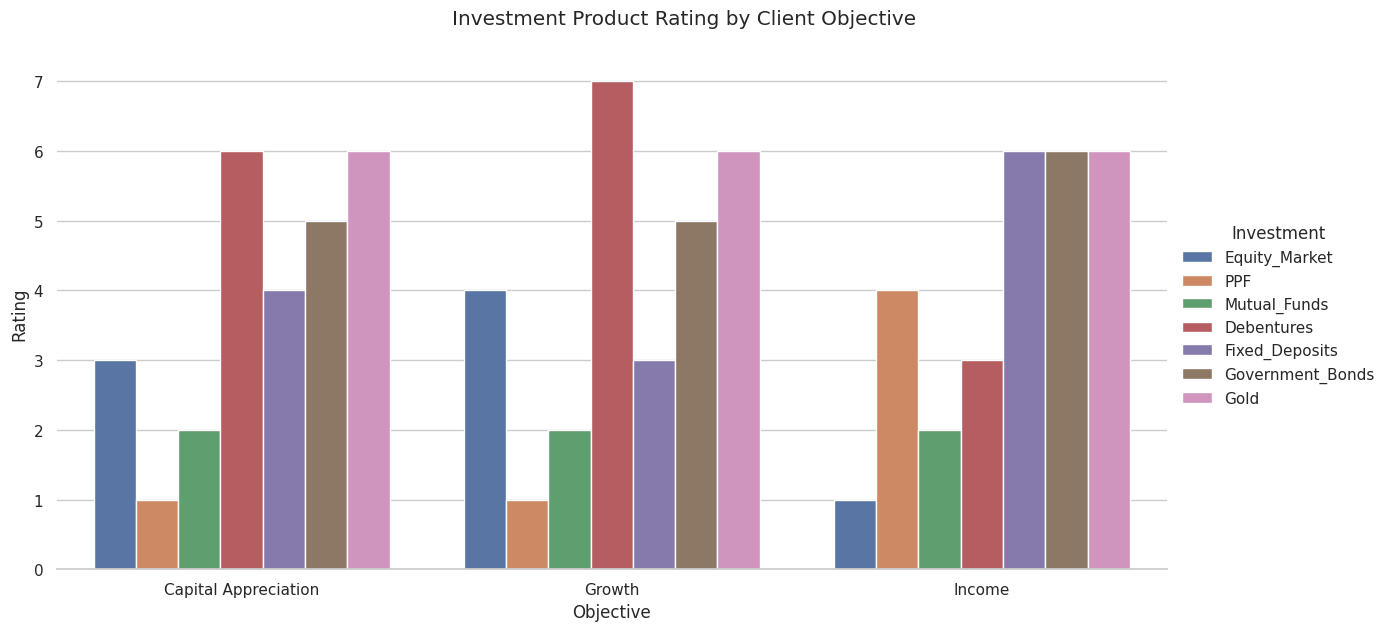

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df_g es tu DataFrame original

# Convertir el DataFrame al formato largo
df_long = pd.melt(df_g, id_vars=['Objective'], var_name='Investment', value_name='Rating').sort_values(by="Rating")

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico más grande
g = sns.catplot(data=df_long, x='Objective', y='Rating', hue='Investment', kind='bar', height=6, aspect=2)
g.despine(left=True)
g.fig.suptitle("Investment Product Rating by Client Objective", y=1.05)  # Ajustar la posición del título

# Mostrar el gráfico
plt.show()


Gráfico 3



In [ ]:
invest=["Mutual_Funds","Equity_Market","Debentures","Government_Bonds","Fixed_Deposits","PPF","Gold"]

In [ ]:
da=df[["Reason_Bonds"]+invest].loc[df["Reason_Bonds"]!="Tax Incentives"]

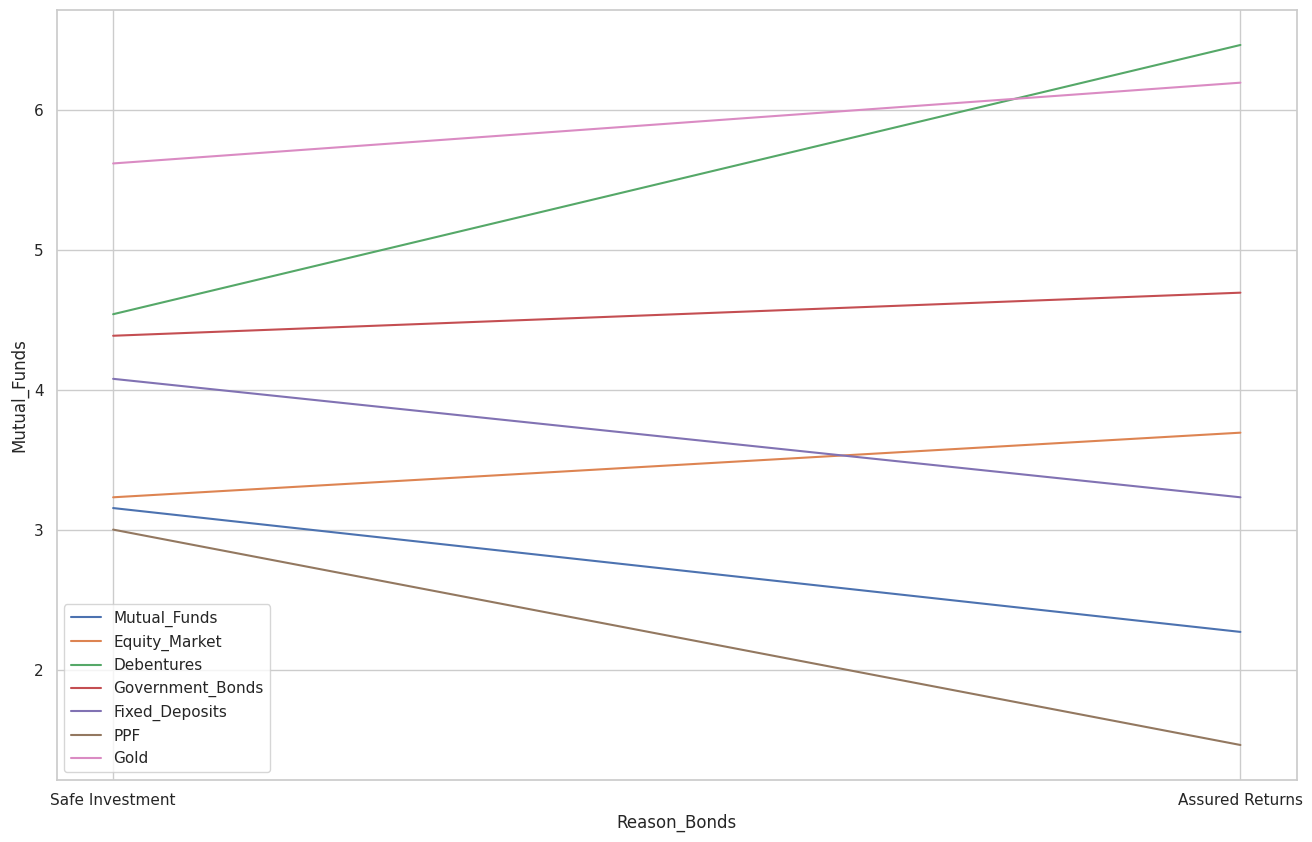

In [ ]:
for x in invest:
  g=sns.lineplot(data=da, x="Reason_Bonds", y=x, errorbar=None, legend='brief', label=str(x))
  g.figure.set_size_inches(16,10)

In [ ]:
from scipy import stats
db=da

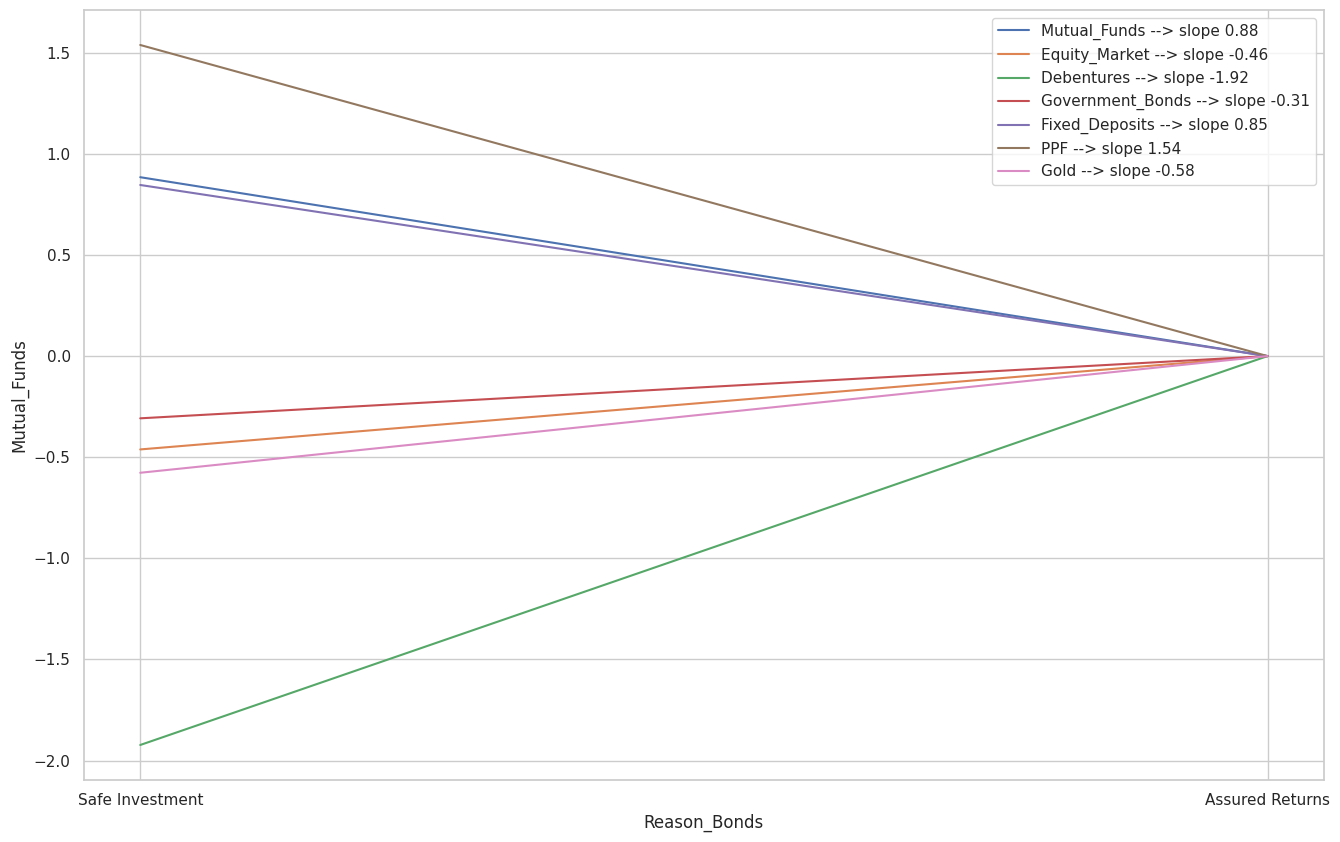

In [ ]:
for x in invest:
  slope, intercept, r_value, p_value, std_err = stats.linregress([0,1],list(db.groupby(by="Reason_Bonds").mean()[x]))
  if slope>0:
    db[x]=db[x]-intercept
  else:
    db[x]=db[x]-intercept
  g=sns.lineplot(data=db, x="Reason_Bonds", y=x, errorbar=None, legend='brief', label=str(x)+f" --> slope {round(slope,2)}")
  g.figure.set_size_inches(16,10)